In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv('customer_churn_dataset.csv')

In [73]:
data.drop_duplicates().shape == data.shape

True

# there is not a single entry which has duplicate values.

In [75]:
data.drop_duplicates().shape == data.shape

True

In [77]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [79]:
data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [81]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

### 84% young 
### 16% senior citizen

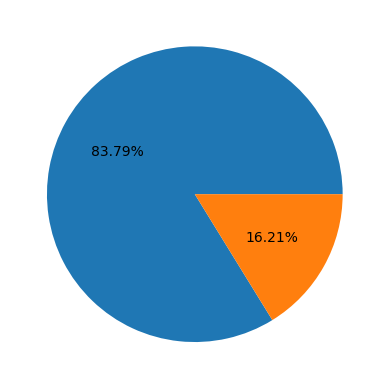

In [83]:
plt.pie(data['SeniorCitizen'].value_counts(),autopct='%.2f%%')
plt.show()

In [85]:
data.Dependents.value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [87]:
data.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [89]:
data.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [91]:
data.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [97]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### initial Observations:
1) data contain ~7000 rows and 21 columns
2) data has no duplicate entry
3) data has no missing values
4) data has both categorical and numerical columns
5) Datatypes of most columns are object.
6) Target variable churn(Yes/No)

In [99]:
data.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [101]:
data.TotalCharges.isna().value_counts()

TotalCharges
False    7043
Name: count, dtype: int64

In [103]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)

In [ ]:
data.TotalCharges.value_counts()

In [105]:
data['TotalCharges']=data.TotalCharges.astype(float)

In [ ]:
data.info()

In [107]:
data['TotalCharges'].isna().sum()

11

In [109]:
data.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
data

### Encode Target Variable
### Let’s convert the Churn column from Yes/No → 1/0

In [111]:
data['Churn']=data['Churn'].map({'Yes':1,'No':0})

In [113]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [115]:
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Churn')  # exclude target

print("Categorical:", cat_cols)
print("Numerical:", num_cols)


Categorical: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
num_cols

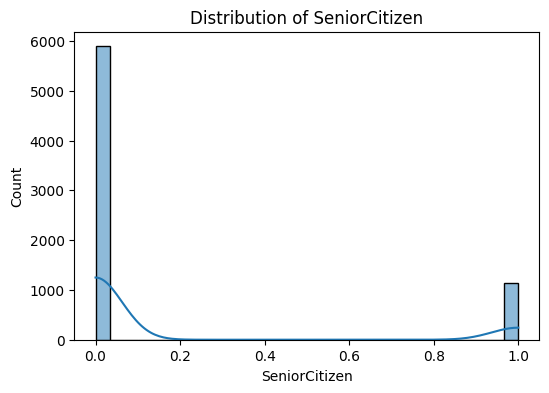

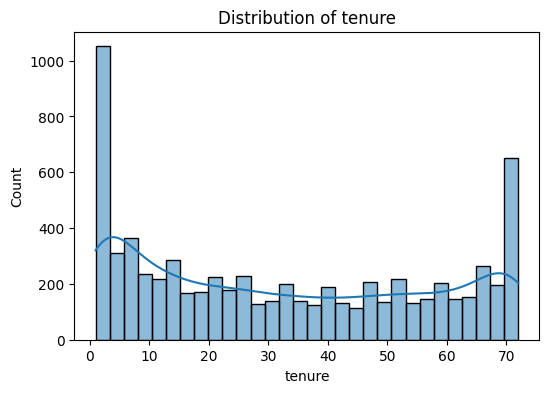

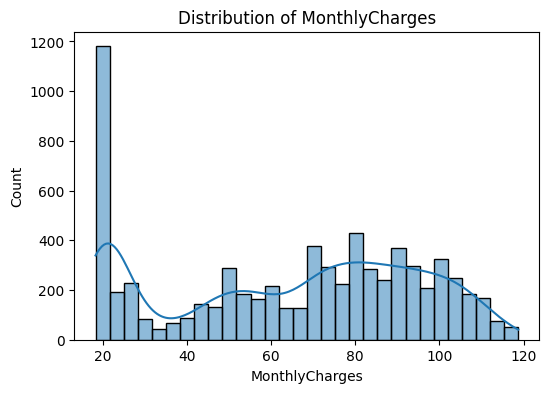

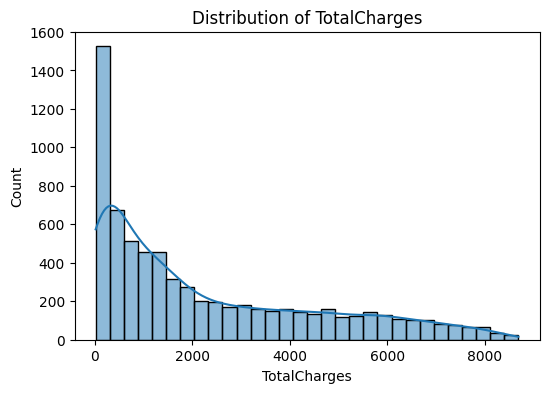

In [117]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

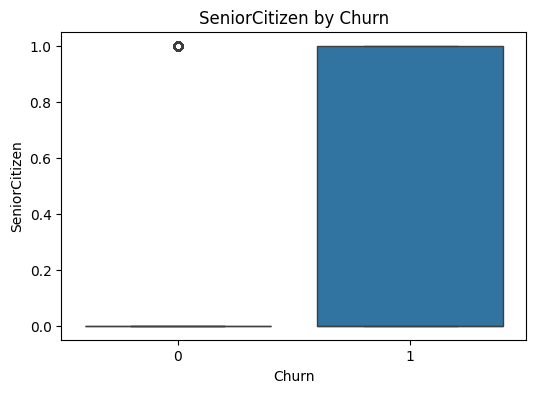

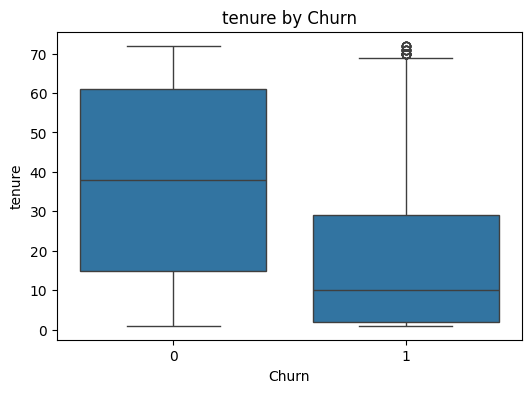

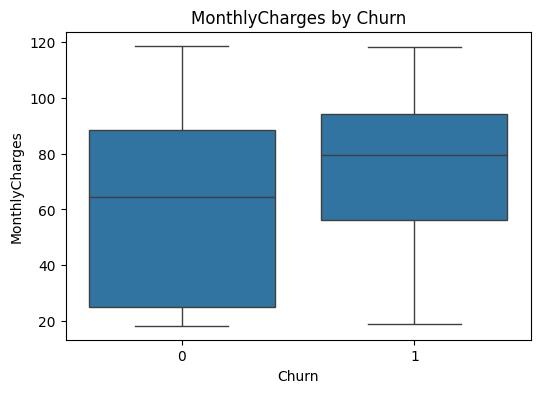

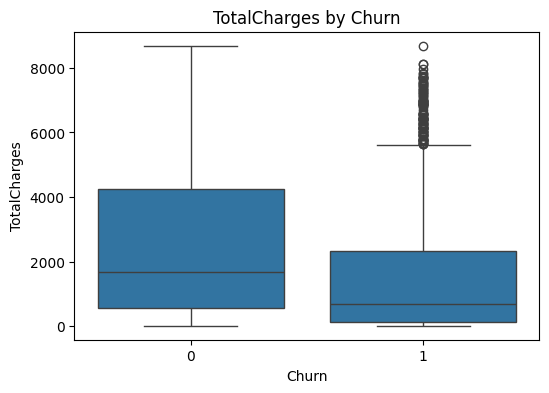

In [119]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} by Churn')
    plt.show()


### ### Key EDA Findings

- Customers with shorter tenure and higher MonthlyCharges are more likely to churn.
- Features like `Contract`, `PaymentMethod`, `TechSupport`, and `InternetService` show strong relationships with churn.
- `TotalCharges` had missing/invalid values we handled.
- Target variable `Churn` was imbalanced (~26% churn rate).


In [123]:
data.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
539,5394-MEITZ,Female,0,Yes,Yes,60,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.6,4946.7,0


In [125]:
data.to_csv('clean_churn_data.csv',index=False)